Implement a DFT(x, N) function using your own function, loop code, and sin/cos functions.  x is your input sequence (could be Python list or a Numpy vector -- your choice);  N is the number of points in the DFT.  (Do not use any library DFT or FFT function nor complex math representations;  keep track of the two components re/im yourself).

In [1]:
import sympy as sym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy
import math

%matplotlib inline
sym.init_printing()

In [2]:
#x = [-2,-3,-4,-9,-1,-7]
#N = 6
def dft(x, N):
    rels = []
    imls = []
    for m in range(N):
        #print(m)
        re = 0
        im = 0
        for i in range(N):
            recp = x[i] * np.cos(2*np.pi*i*m/N)
            re = recp + re
            imcp = -x[i] * np.sin(2*np.pi*i*m/N)
            im = imcp + im
        rels.append(re)
        imls.append(im)
    return (rels, imls)
#ls = dft(x, N)
#print(ls)

"Re-build" Example 1 and figures similar to 3-2 and 3-3.  (Do not have to be exactly like, but illustrate the same points;  could use a stem plot for discrete samples).  Generate figures similar to 3-4 of the magnitude and phase as well as "real" and "imag" components.

The input signal

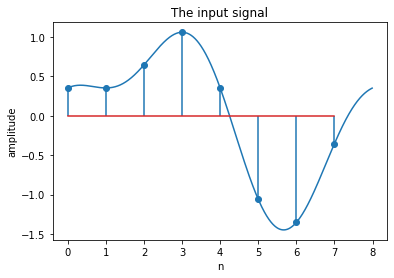

In [3]:
fig1 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = np.arange(8)
y1 = np.sin(2*np.pi*1000/8000*x1) + 0.5*np.sin(2*np.pi*2000/8000*x1 + 3*np.pi/4)
plt.stem(x1, y1, use_line_collection=True)
#N = 8
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('The input signal');

The m = 1 sinusoids, re = cos(2*pi*n/8), im = sin(2*pi*n/8)

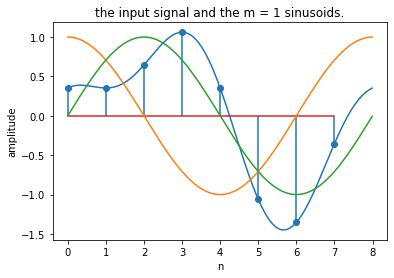

In [4]:
fig2 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 1 sinusoids.');

The m = 2 sinusoids, re = cos(2*pi*n*2/8), im = sin(2*pi*n*2/8)

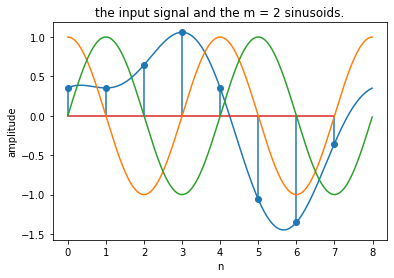

In [5]:
fig3 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2*2 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2*2 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 2 sinusoids.');

The m = 3 sinusoids, re = cos(2*pi*n*3/8), im = sin(2*pi*n*3/8)

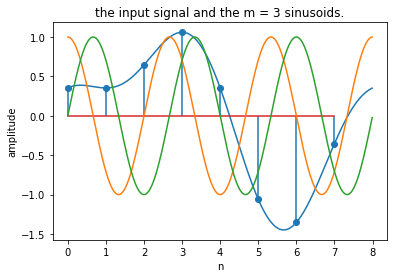

In [6]:
fig4 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2*3 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2*3 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 3 sinusoids.');

The m = 4 sinusoids, re = cos(2*pi*n*4/8), im = sin(2*pi*n*4/8)

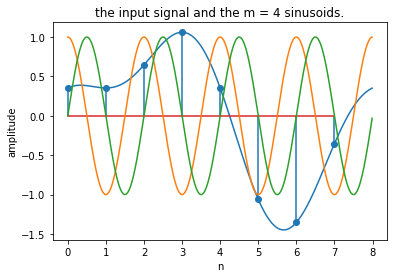

In [7]:
fig5 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2*4 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2*4 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 4 sinusoids.');

The m = 5 sinusoids, re = cos(2*pi*n*5/8), im = sin(2*pi*n*5/8)

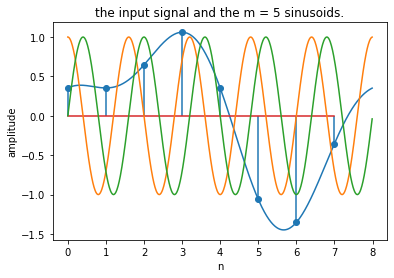

In [8]:
fig6 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2*5 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2*5 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 5 sinusoids.');

The m = 6 sinusoids, re = cos(2*pi*n*6/8), im = sin(2*pi*n*6/8)

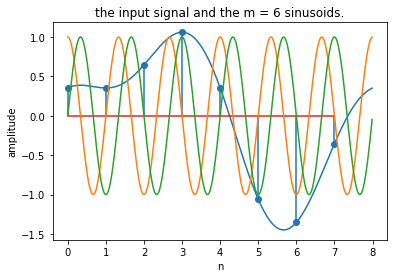

In [9]:
fig7 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2*6 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2*6 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 6 sinusoids.');

The m = 7 sinusoids, re = cos(2*pi*n*7/8), im = sin(2*pi*n*7/8)

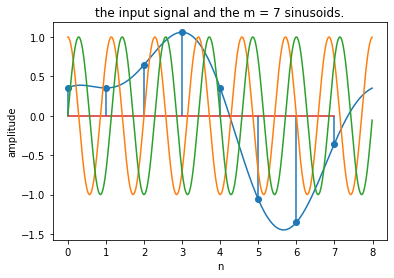

In [10]:
fig8 = plt.figure()
x = np.arange(0, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
plt.plot(x,y)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
plt.stem(x1, y1, use_line_collection=True)
x2 = np.arange(0, 8, 0.01)
re = np.cos(2*np.pi*x2*7 / 8)
plt.plot(x2,re)
im = np.sin(2*np.pi*x2*7 / 8)
plt.plot(x2, im)
plt.xlabel('n')
plt.ylabel('amplitude')
plt.title('the input signal and the m = 7 sinusoids.');

Magnitude of X(m)

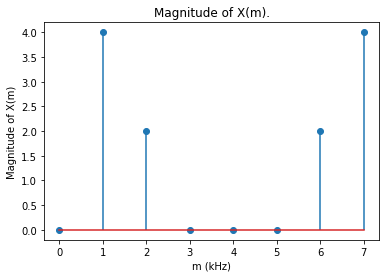

In [11]:
x = np.arange(8)
y = np.sin(2*np.pi*1000/8000*x) + 0.5*np.sin(2*np.pi*2000/8000*x + 3*np.pi/4)
# x = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
N = 8
ls = dft(y, N)
#print(ls)
x1 = [0, 1, 2, 3, 4, 5, 6, 7]
fig9 = plt.figure()
mag = []
for i in range(N):
    k = np.sqrt(ls[0][i]**2 + ls[1][i]**2)
    mag.append(k)
#print(mag)
plt.stem(x1, mag, use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Magnitude of X(m)')
plt.title('Magnitude of X(m).');

Phase of X(m)

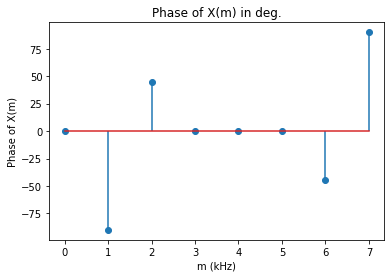

In [12]:
fig10 = plt.figure()
phase = []
for i in range(N):
    tmpRe = ls[0][i] if abs(ls[0][i]) > 1e-2 else 0
    tmpIm = ls[1][i] if abs(ls[1][i]) > 1e-2 else 0
    k = np.sqrt(tmpRe**2 + tmpIm**2)
    if k == 0:
        degk = 0
    else:
        radk = np.arcsin(tmpIm/k)
#         radk = np.arctan(tmpIm / tmpRe)
#         radk = np.arctan(ls[1][i]/ls[0][i])
        degk = math.degrees(radk)
    
    phase.append(degk)
    
#print(phase)
plt.stem(x1, phase, use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Phase of X(m)')
plt.title('Phase of X(m) in deg.');

Real part of X(m)

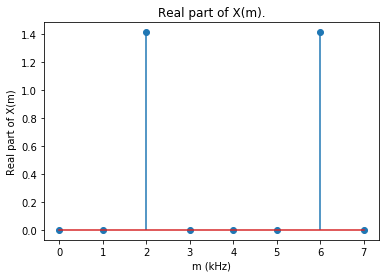

In [13]:
fig11 = plt.figure()
plt.stem(x1, ls[0], use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Real part of X(m)')
plt.title('Real part of X(m).');

Imaginary part of X(m)

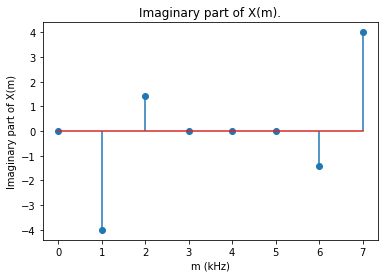

In [14]:
fig12 = plt.figure()
plt.stem(x1, ls[1],  use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Imaginary part of X(m)')
plt.title('Imaginary part of X(m).');

"Re-build" Example 2 and figures similar to 3-5 and 3-6 to demonstrate DFT shifting.

DFT shifting, shift the Example 1 input sequence later in time by k = 3 samples.

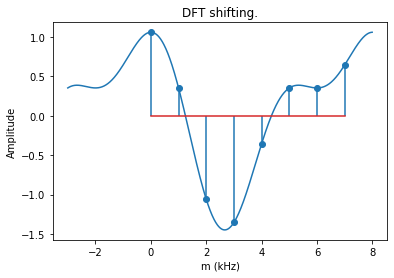

In [15]:
fig13 = plt.figure()
x = np.arange(-3, 8, 0.01)
y = np.sin(2*np.pi*1000/8000*(x+3)) + 0.5*np.sin(2*np.pi*2000/8000*(x+3) + 3*np.pi/4)
plt.plot(x,y)
x1 = np.arange(0,8,1)
y1 = np.sin(2*np.pi*1000/8000*(x1+3)) + 0.5*np.sin(2*np.pi*2000/8000*(x1+3) + 3*np.pi/4)
plt.stem(x1,y1,use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Amplitude')
plt.title('DFT shifting.');

Magnitude of Xshifted(m)

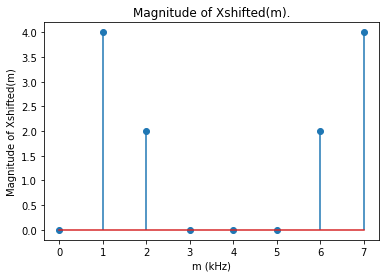

In [16]:
xs = np.arange(8)
ys = np.sin(2*np.pi*1000/8000*(xs+3)) + 0.5*np.sin(2*np.pi*2000/8000*(xs+3) + 3*np.pi/4)
# x = [0.3535, 0.3535, 0.6464, 1.0607, 0.3535, -1.0607, -1.3535, -0.3535]
Ns = 8
lss = dft(ys, Ns)
#print(ls)
x1s = [0, 1, 2, 3, 4, 5, 6, 7]
fig14 = plt.figure()
mags = []
for i in range(Ns):
    k = np.sqrt(lss[0][i]**2 + lss[1][i]**2)
    mags.append(k)
#print(mag)
plt.stem(x1s, mags, use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Magnitude of Xshifted(m)')
plt.title('Magnitude of Xshifted(m).');

Phase of Xshifted(m)

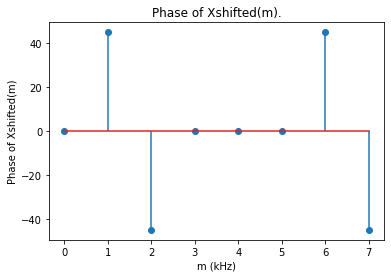

In [17]:
fig15 = plt.figure()
phases2 = []
for i in range(Ns):
    tmpRe = lss[0][i] if abs(lss[0][i]) > 1e-2 else 0
    tmpIm = lss[1][i] if abs(lss[1][i]) > 1e-2 else 0
    k = np.sqrt(tmpRe**2 + tmpIm**2)
    if k == 0:
        degk = 0
    else:
        radk = np.arcsin(tmpIm/k)
#         radk = np.arctan(tmpIm / tmpRe)
#         radk = np.arctan(ls[1][i]/ls[0][i])
        degk = math.degrees(radk)
    
    phases2.append(degk)
    
#print(phase)
plt.stem(x1s, phases2, use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Phase of Xshifted(m)')
plt.title('Phase of Xshifted(m).');

Real part of Xshifted(m)

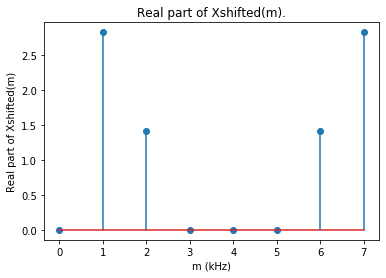

In [18]:
fig16 = plt.figure()
plt.stem(x1s, lss[0], use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Real part of Xshifted(m)')
plt.title('Real part of Xshifted(m).');

Imaginary part of Xshifted(m)

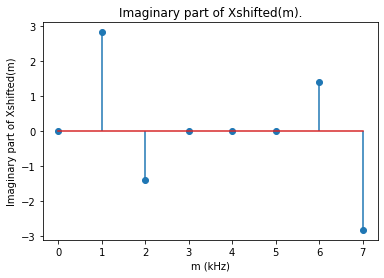

In [19]:
fig17 = plt.figure()
plt.stem(x1s, lss[1], use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('Imaginary part of Xshifted(m)')
plt.title('Imaginary part of Xshifted(m).');

Create figures similar to Figures 3-7 and 3-8 to demonstrate leakage.

Input sequence of three cycles and the m = 4 analysis frequency sinusoids, im = sin(2*pi*n*4/64)

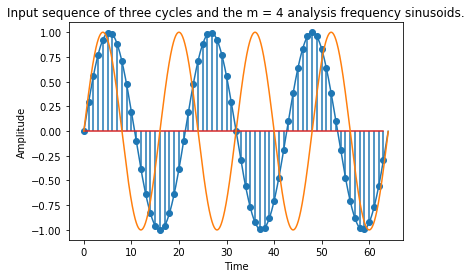

In [20]:
fig17 = plt.figure()
xor1 = np.arange(0,64,0.01)
xor = np.arange(64)
yor1 = np.sin(2*np.pi/(64/3)*xor1)
yor = np.sin(2*np.pi/(64/3)*xor)
plt.plot(xor1, yor1)
plt.stem(xor, yor, use_line_collection=True)
yor2 = np.sin(2*np.pi*xor1*4/64)
plt.plot(xor1, yor2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input sequence of three cycles and the m = 4 analysis frequency sinusoids.');

DFT output magnitude of input sequence of three cycles

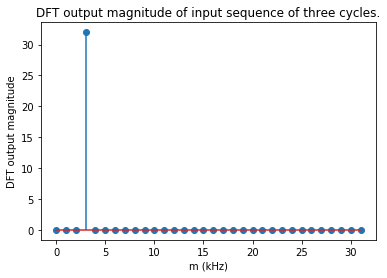

In [21]:
xor2 = np.arange(64)
yor2 = np.sin(2*np.pi/(64/3)*xor)
Nor = 64
lsor = dft(yor2, Nor)
#print(ls)
fig18 = plt.figure()
xor3 = np.arange(32)
mags = []
for i in range(Nor):
    k = np.sqrt(lsor[0][i]**2 + lsor[1][i]**2)
    mags.append(k)
#print(mag)
plt.stem(xor3, mags[0:32], use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('DFT output magnitude')
plt.title('DFT output magnitude of input sequence of three cycles.');

Input sequence of 3.4 cycles and the m = 4 analysis frequency sinusoids

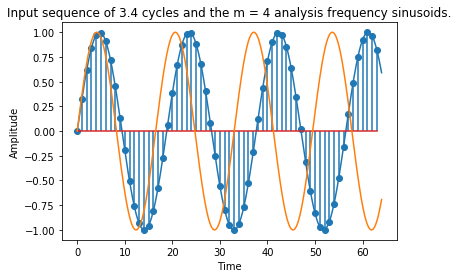

In [22]:
fig19 = plt.figure()
xor12 = np.arange(0,64,0.01)
xor2 = np.arange(64)
yor12 = np.sin(2*np.pi/(64/3.4)*xor12)
yor2 = np.sin(2*np.pi/(64/3.4)*xor2)
plt.plot(xor12, yor12)
plt.stem(xor2, yor2, use_line_collection=True)
yor22 = np.sin(2*np.pi*xor1*4/66)
plt.plot(xor12, yor22)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input sequence of 3.4 cycles and the m = 4 analysis frequency sinusoids.');

DFT output magnitude of input sequence of 3.4 cycles

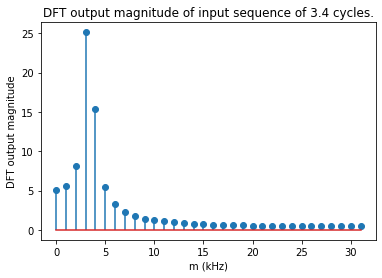

In [23]:
xor22 = np.arange(64)
yor22 = np.sin(2*np.pi/(64/3.4)*xor2)
Nor2 = 64
lsor2 = dft(yor22, Nor2)
#print(ls)
fig20 = plt.figure()
xor32 = np.arange(32)
mags2 = []
for i in range(Nor):
    k = np.sqrt(lsor2[0][i]**2 + lsor2[1][i]**2)
    mags2.append(k)
#print(mag)
plt.stem(xor32, mags2[0:32], use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('DFT output magnitude')
plt.title('DFT output magnitude of input sequence of 3.4 cycles.');

Graduate students:  also generate a figure similar to Figure 3-14 to demonstrate minimal leakage near half of the folding frequency.

64 point DFT. DFT output magnitude when DFT input is 16.4 cycles per sample interval

Full output spectrum view

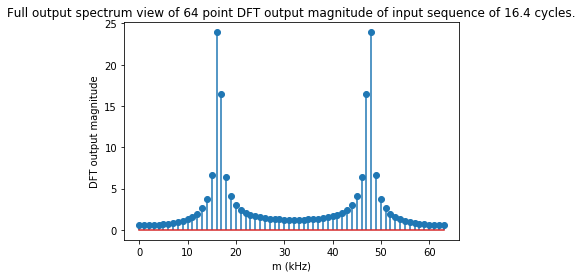

In [24]:
xor23 = np.arange(64)
yor23 = np.sin(2*np.pi/(64/16.4)*xor2)
Nor3 = 64
lsor3 = dft(yor23, Nor3)
#print(ls)
fig20 = plt.figure()
xor33 = np.arange(64)
mags3 = []
for i in range(Nor):
    k = np.sqrt(lsor3[0][i]**2 + lsor3[1][i]**2)
    mags3.append(k)
#print(mag)
plt.stem(xor33, mags3, use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('DFT output magnitude')
plt.title('Full output spectrum view of 64 point DFT output magnitude of input sequence of 16.4 cycles.');

Close-up view showing minimized leakage asymmetry at frequency m = N/4

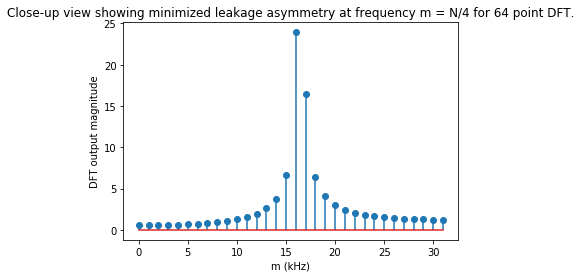

In [25]:
fig21 = plt.figure()
xor34 = np.arange(32)
plt.stem(xor34, mags3[0:32], use_line_collection=True)
plt.xlabel('m (kHz)')
plt.ylabel('DFT output magnitude')
plt.title('Close-up view showing minimized leakage asymmetry at frequency m = N/4 for 64 point DFT.');